In [6]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train.shape, y_train.shape

((120, 2), (120,))

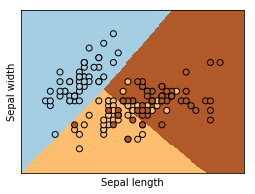

In [7]:
h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [3]:
from sklearn.metrics import confusion_matrix, classification_report

# test values
y_predicted = logreg.predict(X_test)
# print confusion matrix
confusion = confusion_matrix(y_test, y_predicted)
print('Confusion matrix')
print(confusion)

Confusion matrix
[[11  0  0]
 [ 0  7  6]
 [ 0  1  5]]


In [4]:
print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.88      0.54      0.67        13
          2       0.45      0.83      0.59         6

avg / total       0.84      0.77      0.77        30

